<a href="https://colab.research.google.com/github/daisyKim12/Tensorflow_Study/blob/main/Lecture_C2_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category 2 - Iris Flower Image Classification
* Classification using Fully Connected Layer(Dense)  
* Preprocessing data using tensorflow-datasets

#Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

#Load dataset

when loading data from tfds, split the data to make train_dataset and valid_dataset with weight of 8:2.

In [ ]:
train_dataset = tfds.load('iris', split='train[:80%]')
valid_dataset = tfds.load('iris', split='train[80%:]')

Preprocess the data with two conditions
1. one-hot-encode Label data
2. split data into feature (x) and label (y)

In [ ]:
for data in train_dataset.take(5) :
  print(data)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.1, 3.4, 1.5, 0.2], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([7.7, 3. , 6.1, 2.3], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.7, 2.8, 4.5, 1.3], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.8, 3.2, 5.9, 2.3], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.2, 3.4, 1.4, 0.2], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}


In [ ]:
for data in train_dataset:
  x = data['features']
  y = data['label']
  y = tf.one_hot(y, 3)

In [ ]:
def preprocess(data):

    x = data['features']
    y = data['label']
    y = tf.one_hot(y, 3)
    return x, y

In [ ]:
batch_size = 10
train_data = train_dataset.map(preprocess).batch(batch_size)
valid_data = valid_dataset.map(preprocess).batch(batch_size)

#Modeling

In [ ]:
model = tf.keras.Sequential([
    Dense(512, activation='relu', input_shape = [4]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               2560      
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-tr

#Compile

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

#ModelCheckpoint

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only = True,
                             save_best_only = True,
                             monitor = 'val_loss',
                             verbose=1)

#Fit

In [ ]:
history = model.fit(train_data,
                    validation_data=(valid_data),
                    epochs=20,
                    callbacks=[checkpoint],
                    )

Epoch 1/20
 1/12 [=>............................] - ETA: 23s - loss: 1.0860 - acc: 0.4000
Epoch 1: val_loss improved from inf to 0.80128, saving model to my_checkpoint.ckpt
12/12 [==============================] - 2s 28ms/step - loss: 0.9632 - acc: 0.5250 - val_loss: 0.8013 - val_acc: 0.6333
Epoch 2/20
 1/12 [=>............................] - ETA: 0s - loss: 0.7962 - acc: 0.6000
Epoch 2: val_loss improved from 0.80128 to 0.52342, saving model to my_checkpoint.ckpt
12/12 [==============================] - 0s 11ms/step - loss: 0.6326 - acc: 0.7250 - val_loss: 0.5234 - val_acc: 0.6333
Epoch 3/20
 1/12 [=>............................] - ETA: 0s - loss: 0.5032 - acc: 0.6000
Epoch 3: val_loss improved from 0.52342 to 0.33128, saving model to my_checkpoint.ckpt
12/12 [==============================] - 0s 11ms/step - loss: 0.3626 - acc: 0.7750 - val_loss: 0.3313 - val_acc: 0.8667
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.2119 - acc: 0.9500
Epoch 4: val_loss improved

#Load Checkpoint

In [ ]:
model.load_weights(checkpoint_path)

#Prediction

In [ ]:
model.evaluate(valid_data)

3/3 [==============================] - 0s 5ms/step - loss: 0.1340 - acc: 0.9333


[0.1340472549200058, 0.9333333373069763]

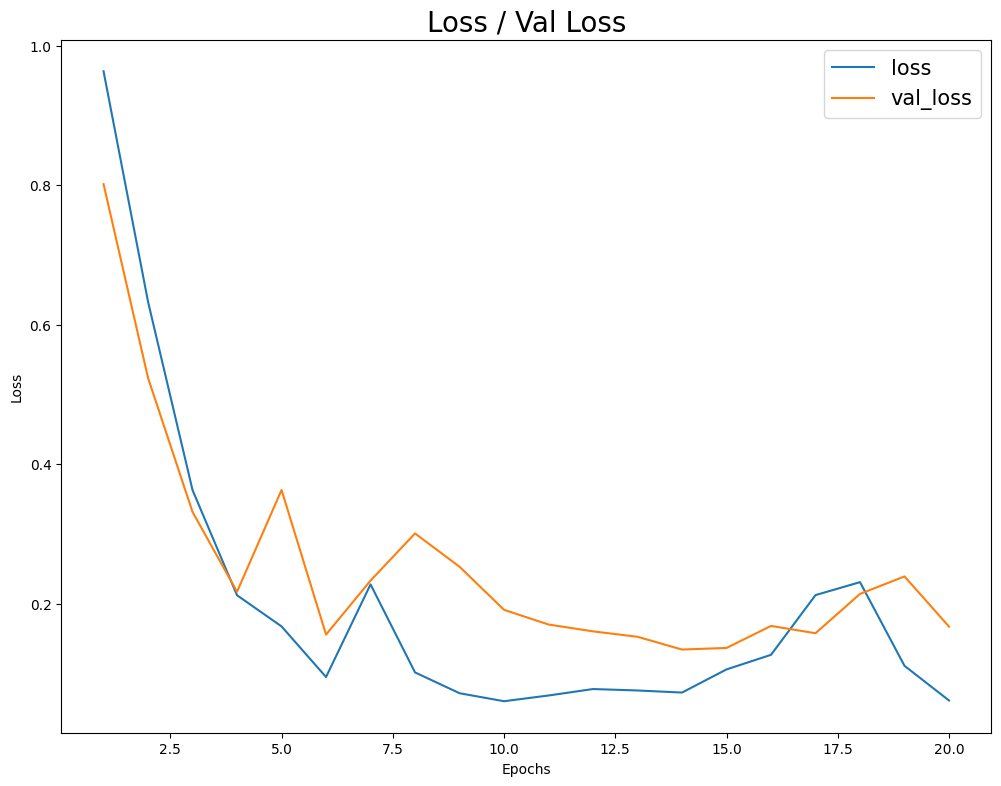

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

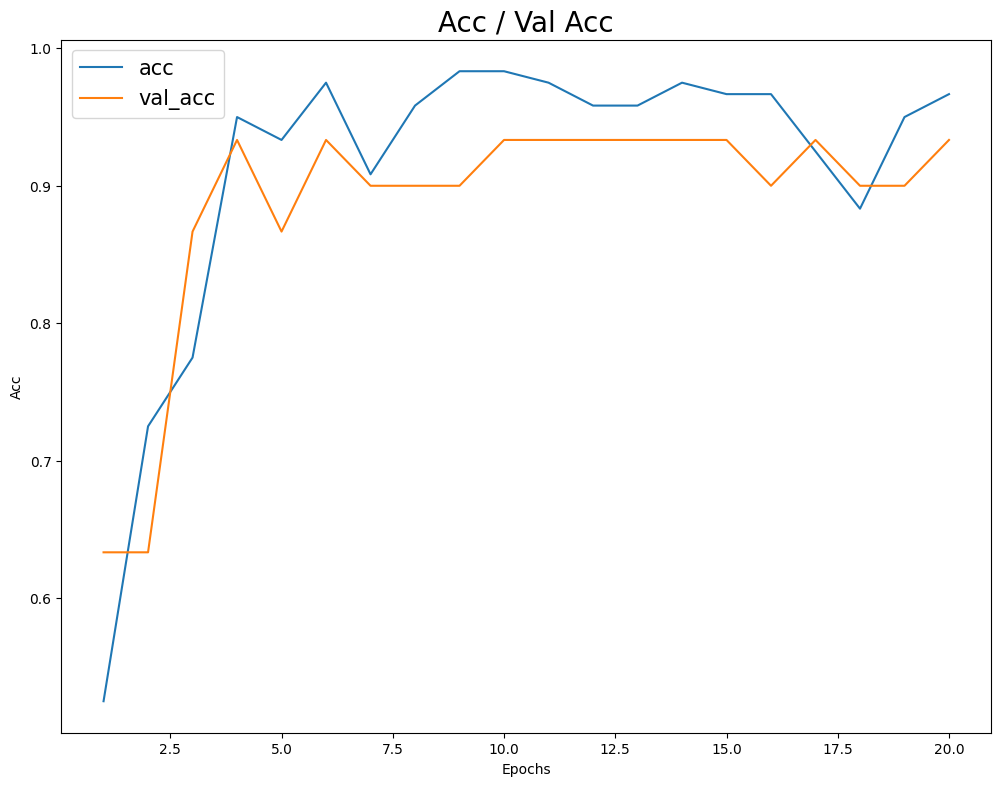

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()